In [1]:
import numpy as np
from scipy import stats
import sympy as sp

![zad1.png](images/note1/zad1.png)

![zad2.png](images/note1/zad2.png)


Characteristic function for Cauchy distribution:
φ(t) = E[e^(itX)] = ∫_{-∞}^{∞} e^(itx) * [1/(π(1+x²))] dx

We are using now Residue theory and we consider a contour in the complex plane so we are getting:

 - for t > 0: Res(e^(itz)/(π(1+z²)), i) = [e^(itz)/(2πi)]_{z=i} = e^(-t)/(2πi) * 2πi = e^(-t)
 - for t < 0: Res(e^(itz)/(π(1+z²)), -i) = [e^(itz)/(2πi)]_{z=-i} = e^(t)/(2πi) * 2πi = e^(t)

Verifying stability law:
For two independent Cauchy random variables X₁ and X₂ with the same parameters:
- The characteristic function of X₁ is φ₁(t) = e^(-|t|)
- The characteristic function of X₂ is φ₂(t) = e^(-|t|)
- The characteristic function of their sum X₁+X₂ is:
   φ₁₊₂(t) = φ₁(t) · φ₂(t) = e^(-|t|) · e^(-|t|) = e^(-2|t|)

This equals the characteristic function of a Cauchy random variable
with scale parameter 2, which is e^(-2|t|)



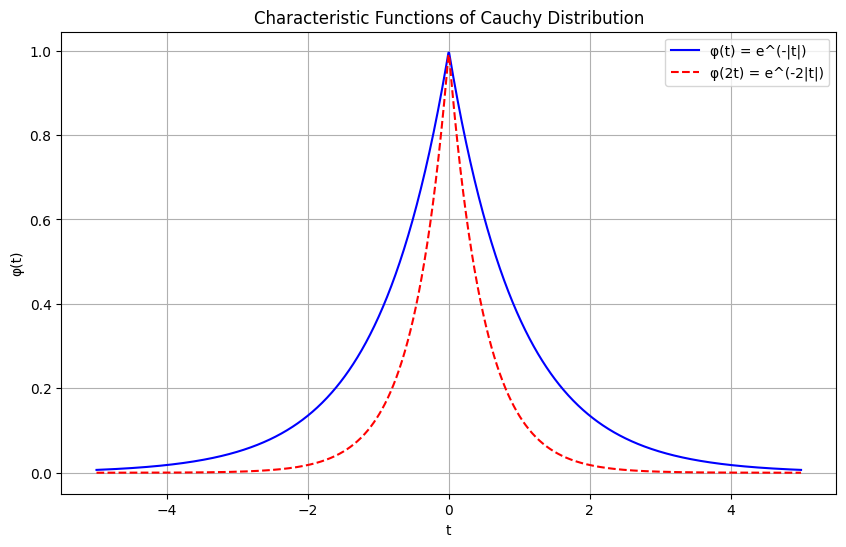

In [5]:
import numpy as np
import matplotlib.pyplot as plt

print("\nCharacteristic function for Cauchy distribution:")
print("φ(t) = E[e^(itX)] = ∫_{-∞}^{∞} e^(itx) * [1/(π(1+x²))] dx\n")
print("We are using now Residue theory and we consider a contour in the complex plane so we are getting:\n")
print(" - for t > 0: Res(e^(itz)/(π(1+z²)), i) = [e^(itz)/(2πi)]_{z=i} = e^(-t)/(2πi) * 2πi = e^(-t)")
print(" - for t < 0: Res(e^(itz)/(π(1+z²)), -i) = [e^(itz)/(2πi)]_{z=-i} = e^(t)/(2πi) * 2πi = e^(t)")
print("\nVerifying stability law:")
print("For two independent Cauchy random variables X₁ and X₂ with the same parameters:")
print("- The characteristic function of X₁ is φ₁(t) = e^(-|t|)")
print("- The characteristic function of X₂ is φ₂(t) = e^(-|t|)")
print("- The characteristic function of their sum X₁+X₂ is:")
print("   φ₁₊₂(t) = φ₁(t) · φ₂(t) = e^(-|t|) · e^(-|t|) = e^(-2|t|)")
print("\nThis equals the characteristic function of a Cauchy random variable")
print("with scale parameter 2, which is e^(-2|t|)\n")

def plot_cauchy_characteristic(t_range=None):
    if t_range is None:
        t_range = np.linspace(-5, 5, 1000)

    # Calculate characteristic functions
    cf_single = np.exp(-np.abs(t_range))
    cf_sum = np.exp(-2 * np.abs(t_range))

    plt.figure(figsize=(10, 6))
    plt.plot(t_range, cf_single, label='φ(t) = e^(-|t|)', color='blue')
    plt.plot(t_range, cf_sum, label='φ(2t) = e^(-2|t|)', color='red', linestyle='--')

    plt.title('Characteristic Functions of Cauchy Distribution')
    plt.xlabel('t')
    plt.ylabel('φ(t)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_cauchy_characteristic()

![zad3.png](images/note1/zad3.png)

![zad4.png](images/note1/zad4.png)

In [3]:
def calculate_normal_quantile(mu, sigma, p):
    """
    Calculate the quantile for a normal distribution N(mu, sigma).
    
    Parameters:
    mu (float): Mean of the normal distribution
    sigma (float): Standard deviation of the normal distribution
    p (float): Probability level (between 0 and 1)
    
    Returns:
    float: The value x such that P(X ≤ x) = p for X ~ N(mu, sigma)
    """
    # Get the z-score for the probability p from the standard normal distribution
    z_score = stats.norm.ppf(p)
    
    # Calculate the quantile for the N(mu, sigma) distribution
    quantile = mu + z_score * sigma
    
    return quantile

# Calculate the 0.9 quantile for N(2, 0.3)
q_90_dist1 = calculate_normal_quantile(2, 0.3, 0.9)

# Calculate the 0.15 quantile for N(100, 6)
q_15_dist2 = calculate_normal_quantile(100, 6, 0.15)

# Print the results
print(f"The 0.9 quantile for N(2, 0.3) is: {q_90_dist1:.4f}")
print(f"The 0.15 quantile for N(100, 6) is: {q_15_dist2:.4f}")

# Let's also show how to calculate these manually (without using scipy)
def calculate_normal_quantile_manual(mu, sigma, p):
    """
    Manually calculate the quantile for a normal distribution using predefined z-scores.
    This is less accurate but demonstrates the concept.
    """
    # Define common z-scores (for educational purposes)
    z_scores = {
        0.01: -2.33, 0.05: -1.645, 0.1: -1.28, 0.15: -1.04, 0.2: -0.84,
        0.25: -0.67, 0.3: -0.52, 0.35: -0.39, 0.4: -0.25, 0.45: -0.13,
        0.5: 0, 
        0.55: 0.13, 0.6: 0.25, 0.65: 0.39, 0.7: 0.52, 0.75: 0.67,
        0.8: 0.84, 0.85: 1.04, 0.9: 1.28, 0.95: 1.645, 0.99: 2.33
    }
    
    if p in z_scores:
        z = z_scores[p]
        return mu + z * sigma
    else:
        return "Probability not in predefined z-scores table"

# Calculate using the manual method
manual_q_90_dist1 = calculate_normal_quantile_manual(2, 0.3, 0.9)
manual_q_15_dist2 = calculate_normal_quantile_manual(100, 6, 0.15)

print(f"\nUsing manual z-scores:")
print(f"The 0.9 quantile for N(2, 0.3) is: {manual_q_90_dist1:.4f}")
print(f"The 0.15 quantile for N(100, 6) is: {manual_q_15_dist2:.4f}")

The 0.9 quantile for N(2, 0.3) is: 2.3845
The 0.15 quantile for N(100, 6) is: 93.7814

Using manual z-scores:
The 0.9 quantile for N(2, 0.3) is: 2.3840
The 0.15 quantile for N(100, 6) is: 93.7600


![zad5.png](images/note1/zad5.png)

In [4]:
def kurtosis_exponential(lambda_):
    mean = 1 / lambda_ # wartosc oczekiwana (E(X)), mówi jaka jest "przeciętna" wartość zmiennej losowej
    variance = 1 / lambda_**2 # wariancja, im większa jej wartość, tym większe jest rozproszenie wartości wokół średniej
    fourth_moment = 9 / lambda_**4 # czwarty momet, E(X**4), informacja o bardziej ekstremalnych wartościach zmiennej
    kurtosis = fourth_moment / variance**2
    return kurtosis

def kurtosis_uniform(a, b):
    mean = (a + b) / 2
    variance = (b - a)**2 / 12
    fourth_moment = (b - a)**4 / 80
    kurtosis = fourth_moment / variance**2
    return kurtosis

lambda_ = sp.Symbol('lambda', positive=True)
kurt_exp = kurtosis_exponential(lambda_)
kurt_uniform = kurtosis_uniform(-1/2, 1/2)

print("Kurtosis of Exponential Distribution:", kurt_exp)
print("Kurtosis of Uniform Distribution:", kurt_uniform)

if kurt_exp > 3:
    print("The exponential distribution has a high kurtosis which means indicating heavy tails.")
if kurt_uniform < 3:
    print("The uniform distribution has a low kurtosis which means lighter tails compared to a normal distribution.")

Kurtosis of Exponential Distribution: 9
Kurtosis of Uniform Distribution: 1.8000000000000003
The exponential distribution has a high kurtosis which means indicating heavy tails.
The uniform distribution has a low kurtosis which means lighter tails compared to a normal distribution.


![zad6.png](images/note1/zad6.png)

![zad7.png](images/note1/zad7.png)

![zad8.png](images/note1/zad8.png)